In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("dublinbike-historical-data-2021-10.csv")

df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2021-10-01 00:00:03,2021-09-30 23:56:31,BLESSINGTON STREET,20,7,13,OPEN,Blessington Street,53.3568,-6.26814
1,3,2021-10-01 00:00:03,2021-09-30 23:53:57,BOLTON STREET,20,1,19,OPEN,Bolton Street,53.3512,-6.26986
2,4,2021-10-01 00:00:03,2021-09-30 23:56:37,GREEK STREET,20,11,9,OPEN,Greek Street,53.3469,-6.27298
3,5,2021-10-01 00:00:03,2021-09-30 23:54:50,CHARLEMONT PLACE,40,0,40,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2021-10-01 00:00:03,2021-09-30 23:56:04,CHRISTCHURCH PLACE,20,4,16,OPEN,Christchurch Place,53.3434,-6.27012


In [4]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [5]:
df.dtypes

STATION ID                        int64
TIME                     datetime64[ns]
LAST UPDATED                     object
NAME                             object
BIKE_STANDS                       int64
AVAILABLE_BIKE_STANDS             int64
AVAILABLE_BIKES                   int64
STATUS                           object
ADDRESS                          object
LATITUDE                        float64
LONGITUDE                       float64
dtype: object

In [6]:
# Get day of the week
df['weekday'] = df['TIME'].dt.day_name()
df['hour'] = df['TIME'].dt.hour
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,weekday,hour
0,2,2021-10-01 00:00:03,2021-09-30 23:56:31,BLESSINGTON STREET,20,7,13,OPEN,Blessington Street,53.3568,-6.26814,Friday,0
1,3,2021-10-01 00:00:03,2021-09-30 23:53:57,BOLTON STREET,20,1,19,OPEN,Bolton Street,53.3512,-6.26986,Friday,0
2,4,2021-10-01 00:00:03,2021-09-30 23:56:37,GREEK STREET,20,11,9,OPEN,Greek Street,53.3469,-6.27298,Friday,0
3,5,2021-10-01 00:00:03,2021-09-30 23:54:50,CHARLEMONT PLACE,40,0,40,OPEN,Charlemont Street,53.3307,-6.26018,Friday,0
4,6,2021-10-01 00:00:03,2021-09-30 23:56:04,CHRISTCHURCH PLACE,20,4,16,OPEN,Christchurch Place,53.3434,-6.27012,Friday,0


In [30]:
weekdays = df.groupby(['weekday', 'NAME'])['AVAILABLE_BIKES'].mean()

In [31]:
weekdays.head(30)

weekday  NAME                   
Friday   AVONDALE ROAD              15.795833
         BENSON STREET              10.850000
         BLACKHALL PLACE            16.916667
         BLESSINGTON STREET          6.800000
         BOLTON STREET              10.208333
         BROADSTONE                 10.533333
         BROOKFIELD ROAD            11.770833
         BUCKINGHAM STREET LOWER    15.283333
         CATHAL BRUGHA STREET       13.141667
         CHARLEMONT PLACE           18.641667
         CHARLEVILLE ROAD           16.158333
         CHRISTCHURCH PLACE         11.420833
         CITY QUAY                   5.487500
         CLONMEL STREET              4.208333
         COLLINS BARRACKS MUSEUM    13.483333
         CONVENTION CENTRE           3.391667
         CUSTOM HOUSE               15.575000
         CUSTOM HOUSE QUAY          13.970833
         DAME STREET                 8.508333
         DENMARK STREET GREAT        6.216667
         DEVERELL PLACE             19.916667
 

In [36]:
# # weekdays.plot(kind='bar')
# plt.figure()
# for name, groupedData in weekdays.groupby(['NAME']):
#     print(name)
#     groupedData.plot(kind = 'bar', label=name)
#     plt.show()



In [58]:
from sklearn.model_selection import train_test_split
monday = df[(df['weekday']=='Monday') & ( df['NAME'] == 'CITY QUAY')]

x_train, x_test, y_train, y_test = train_test_split(monday['hour'], monday['AVAILABLE_BIKES'], test_size = 0.4, random_state=23)

In [59]:
monday.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,weekday,hour
15415,99,2021-10-04 00:00:02,2021-10-03 23:56:14,CITY QUAY,30,29,0,OPEN,City Quay,53.3466,-6.24615,Monday,0
15525,99,2021-10-04 00:30:02,2021-10-04 00:26:33,CITY QUAY,30,29,0,OPEN,City Quay,53.3466,-6.24615,Monday,0
15635,99,2021-10-04 01:00:02,2021-10-04 00:56:52,CITY QUAY,30,29,0,OPEN,City Quay,53.3466,-6.24615,Monday,1
15745,99,2021-10-04 01:30:03,2021-10-04 01:20:27,CITY QUAY,30,29,0,OPEN,City Quay,53.3466,-6.24615,Monday,1
15855,99,2021-10-04 02:00:03,2021-10-04 01:50:46,CITY QUAY,30,29,0,OPEN,City Quay,53.3466,-6.24615,Monday,2


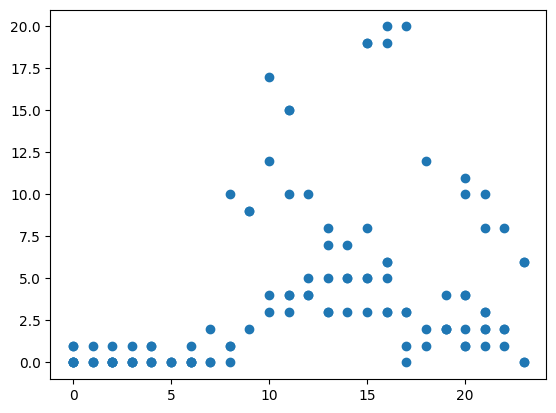

In [60]:
plt.scatter(x_train, y_train)  

In [61]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(x_train)

[[ 1]
 [11]
 [14]
 [ 0]
 [17]
 [15]
 [12]
 [ 4]
 [ 8]
 [ 7]
 [ 3]
 [ 2]
 [ 9]
 [22]
 [13]
 [ 0]
 [20]
 [ 3]
 [20]
 [20]
 [16]
 [12]
 [ 3]
 [10]
 [17]
 [23]
 [21]
 [16]
 [21]
 [18]
 [ 1]
 [ 8]
 [22]
 [ 2]
 [19]
 [21]
 [14]
 [ 5]
 [11]
 [ 6]
 [ 2]
 [ 0]
 [16]
 [12]
 [ 6]
 [15]
 [18]
 [13]
 [ 9]
 [15]
 [ 0]
 [ 5]
 [ 2]
 [ 5]
 [20]
 [10]
 [ 2]
 [16]
 [11]
 [21]
 [ 7]
 [13]
 [ 9]
 [11]
 [16]
 [15]
 [ 4]
 [23]
 [13]
 [ 1]
 [16]
 [22]
 [ 2]
 [ 0]
 [23]
 [22]
 [11]
 [ 6]
 [ 6]
 [ 4]
 [17]
 [14]
 [12]
 [11]
 [ 3]
 [ 7]
 [10]
 [16]
 [ 8]
 [18]
 [23]
 [21]
 [ 8]
 [ 1]
 [ 4]
 [20]
 [15]
 [20]
 [ 0]
 [10]
 [19]
 [ 0]
 [ 6]
 [14]
 [13]
 [ 3]
 [17]
 [ 4]
 [21]
 [19]
 [21]
 [15]
 [19]
 [20]
 [17]]


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(x_train, y_train)

LinearRegression()

In [53]:
c = lr.intercept_
m = lr.coef_
m

array([[-0.01441174]])

In [62]:
y_pred_train = lr.predict(x_train)

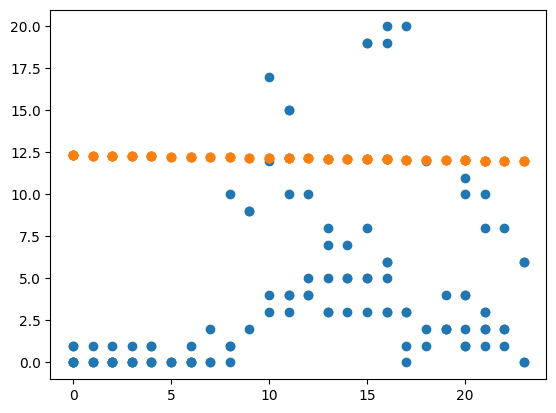

In [63]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

